In [6]:
from pathlib import Path
import sys

sys.path.append(str(Path().cwd().parent))

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from matrix import generate_symmetric_adjacency_matrices_3_eigenvalues, draw_with_big_loops

def get_least_cell_quotient(adj_matrix):
    """
    Compute the quotient matrix for the coarsest equitable partition of a graph.
    
    An equitable partition is a partition where the number of edges from a node
    to cells depends only on which cell the node is in, not the specific node.
    
    Parameters:
    -----------
    adj_matrix : array-like
        The adjacency matrix of the graph
    
    Returns:
    --------
    quotient_matrix : np.ndarray
        The quotient matrix (each entry is the number of edges between cells)
    partition : np.ndarray
        The partition of vertices (cell assignment for each vertex)
    """
    adj = np.array(adj_matrix)
    n = adj.shape[0]
    
    # 1. Start with all nodes in the same partition (color 0)
    partition = np.zeros(n, dtype=int)
    
    while True:
        # 2. For each node, create a signature based on its neighbors' partitions
        # Signature = (current_partition, sorted_list_of_neighbor_partitions)
        signatures = []
        for i in range(n):
            neighbor_parts = sorted(partition[j] for j in range(n) if adj[i, j] > 0)
            signatures.append((partition[i], tuple(neighbor_parts)))
        
        # 3. Map unique signatures to new partition labels (colors)
        unique_sigs = sorted(list(set(signatures)))
        sig_map = {sig: idx for idx, sig in enumerate(unique_sigs)}
        new_partition = np.array([sig_map[sig] for sig in signatures])
        
        # 4. If the partition hasn't changed, we've found the coarsest equitable partition
        if np.array_equal(new_partition, partition):
            break
        partition = new_partition

    # 5. Build the quotient matrix
    num_cells = len(unique_sigs)
    quotient_matrix = np.zeros((num_cells, num_cells))
    
    cells = [np.where(partition == i)[0] for i in range(num_cells)]
    
    for i in range(num_cells):
        for j in range(num_cells):
            # Pick any representative node 'u' from cell i
            u = cells[i][0]
            # Count edges from 'u' to all nodes in cell j
            edge_count = sum(adj[u, v] for v in cells[j])
            quotient_matrix[i, j] = edge_count
            
    return quotient_matrix, partition


In [7]:
n = 4
matrices = generate_symmetric_adjacency_matrices_3_eigenvalues(n)

print(f"Found {len(matrices)} symmetric adjacency matrices of size {n}x{n}")
print(f"with exactly 3 distinct eigenvalues\n")

# Display first few matrices, their eigenvalues, and quotient matrices
for i, mat in enumerate(matrices[:5]):  # Show first 5 examples
    eigenvalues = np.linalg.eigvalsh(mat)
    q_mat, partition = get_least_cell_quotient(mat)
    
    print(f"Matrix {i+1}:")
    print("Adjacency Matrix:")
    print(mat)
    print(f"Eigenvalues: {eigenvalues}")
    print(f"Distinct eigenvalues: {np.unique(np.round(eigenvalues, 9))}")
    print(f"\nQuotient Matrix:")
    print(q_mat.astype(int))
    print(f"Partition: {partition}")
    print("-" * 50 + "\n")


Found 25 symmetric adjacency matrices of size 4x4
with exactly 3 distinct eigenvalues

Matrix 1:
Adjacency Matrix:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]]
Eigenvalues: [-1.  0.  0.  1.]
Distinct eigenvalues: [-1.  0.  1.]

Quotient Matrix:
[[0 0]
 [0 1]]
Partition: [0 0 1 1]
--------------------------------------------------

Matrix 2:
Adjacency Matrix:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 1 1]]
Eigenvalues: [-0.61803399  0.          0.          1.61803399]
Distinct eigenvalues: [-0.61803399  0.          1.61803399]

Quotient Matrix:
[[0 0 0]
 [0 0 1]
 [0 1 1]]
Partition: [0 0 1 2]
--------------------------------------------------

Matrix 3:
Adjacency Matrix:
[[0 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 1 0]]
Eigenvalues: [-1.41421356e+00 -8.10935755e-17  0.00000000e+00  1.41421356e+00]
Distinct eigenvalues: [-1.41421356 -0.          1.41421356]

Quotient Matrix:
[[0 0 0]
 [0 0 1]
 [0 2 0]]
Partition: [0 1 1 2]
--------------------------------------------------

Matrix 4:
Adjacency M

In [8]:
count = {}
for mat in matrices:
    t = np.trace(mat)
    count[t] = count.get(t, 0) + 1

count


{np.int64(0): 5,
 np.int64(1): 7,
 np.int64(2): 3,
 np.int64(3): 5,
 np.int64(4): 5}

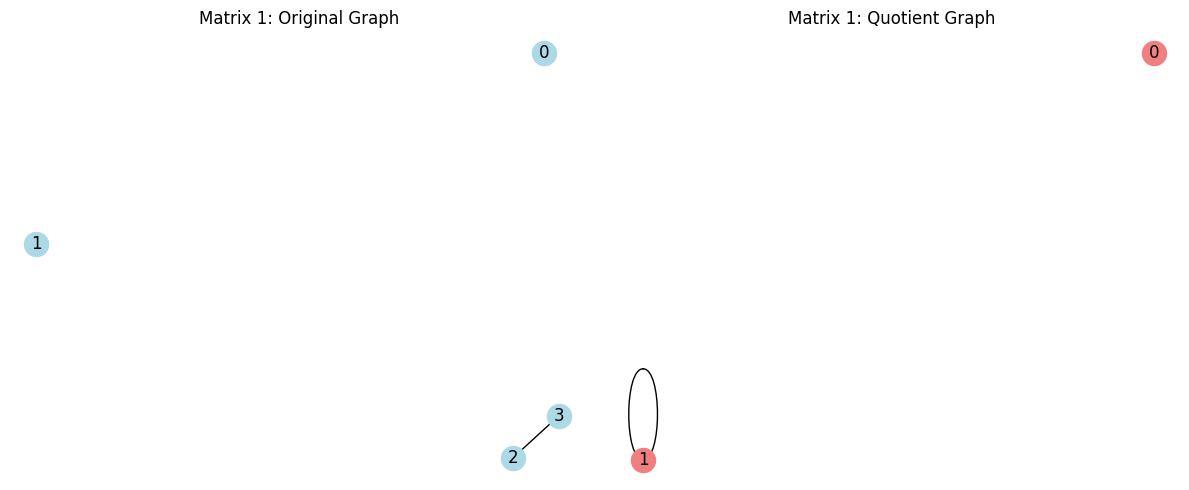

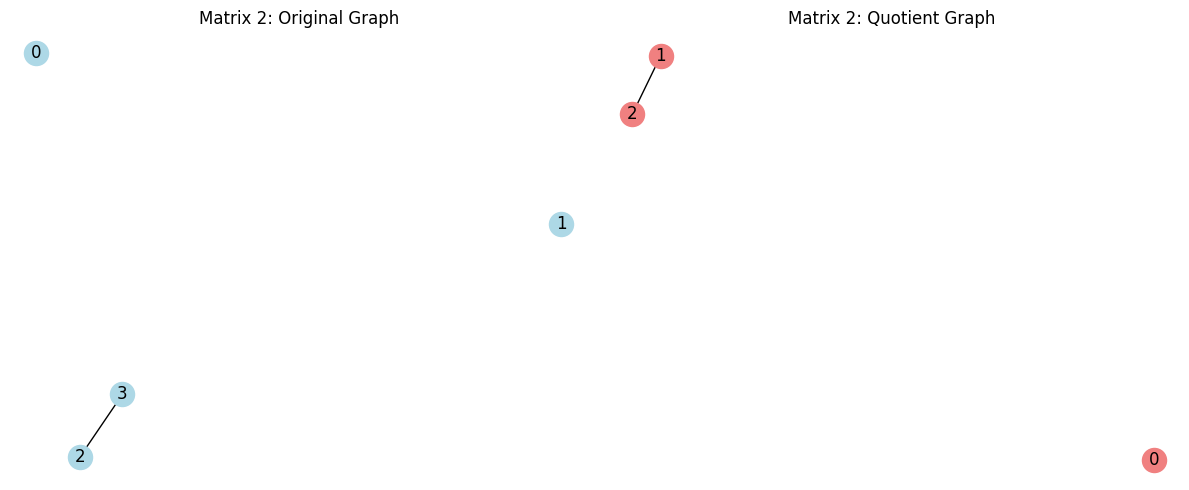

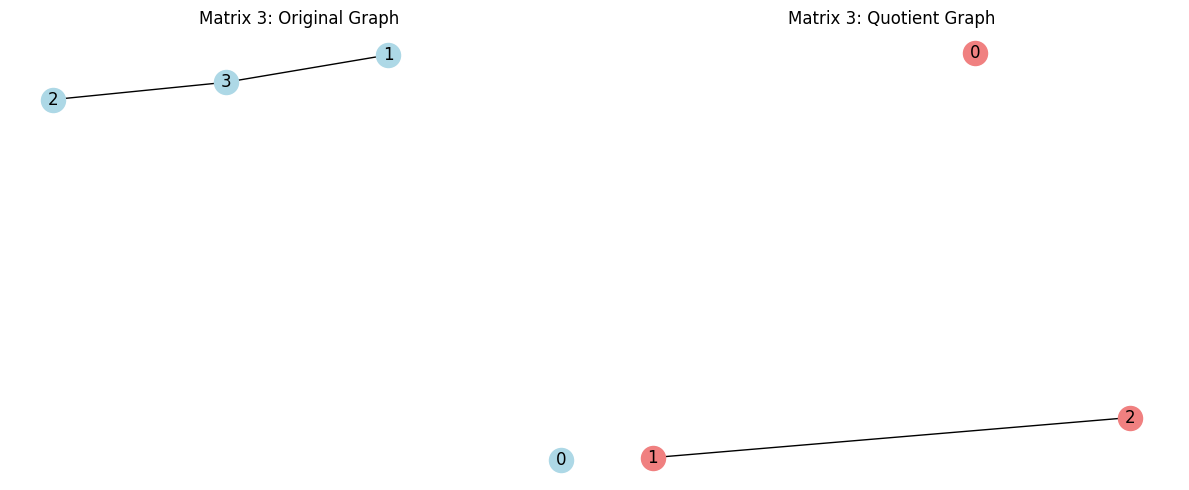

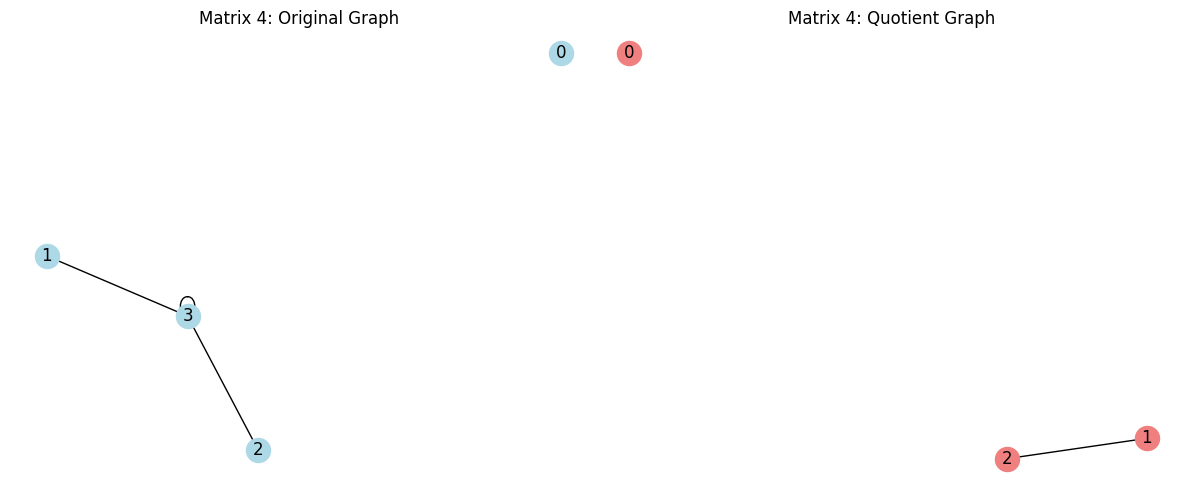

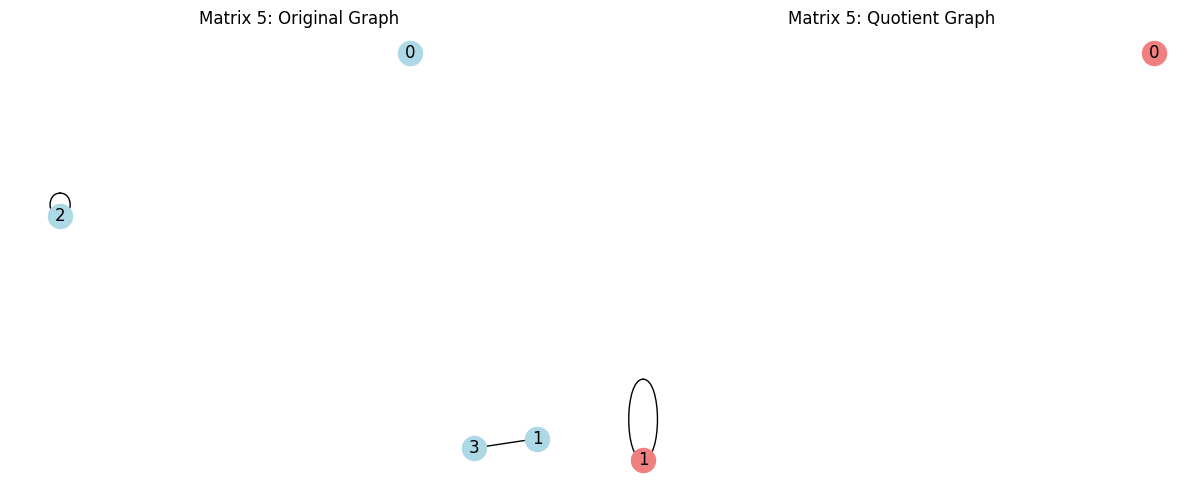

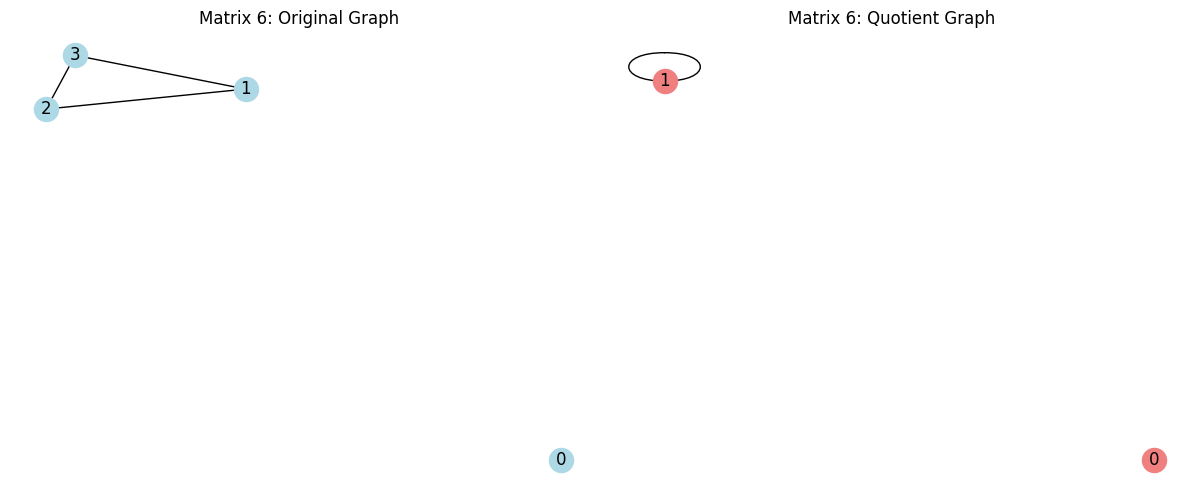

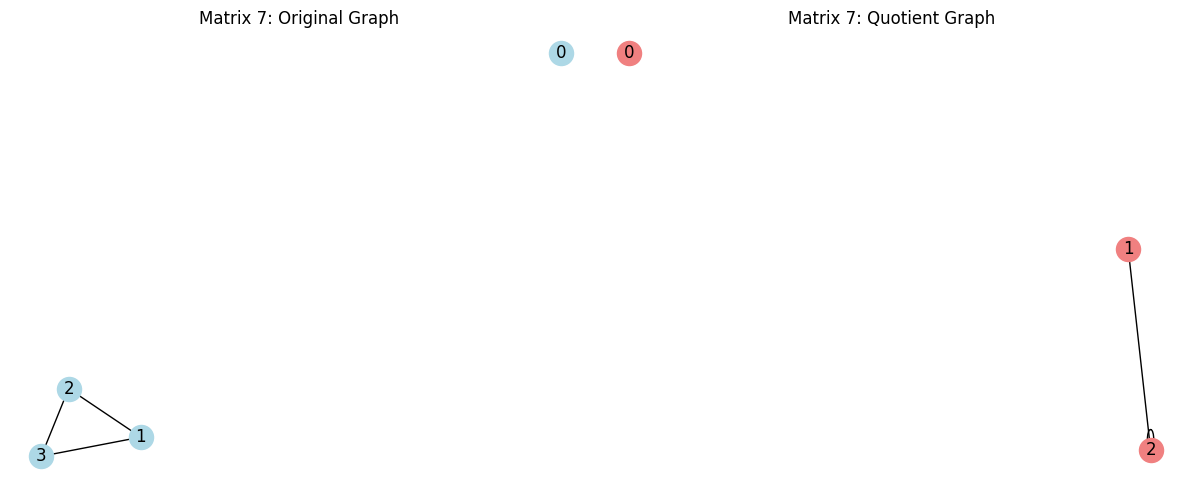

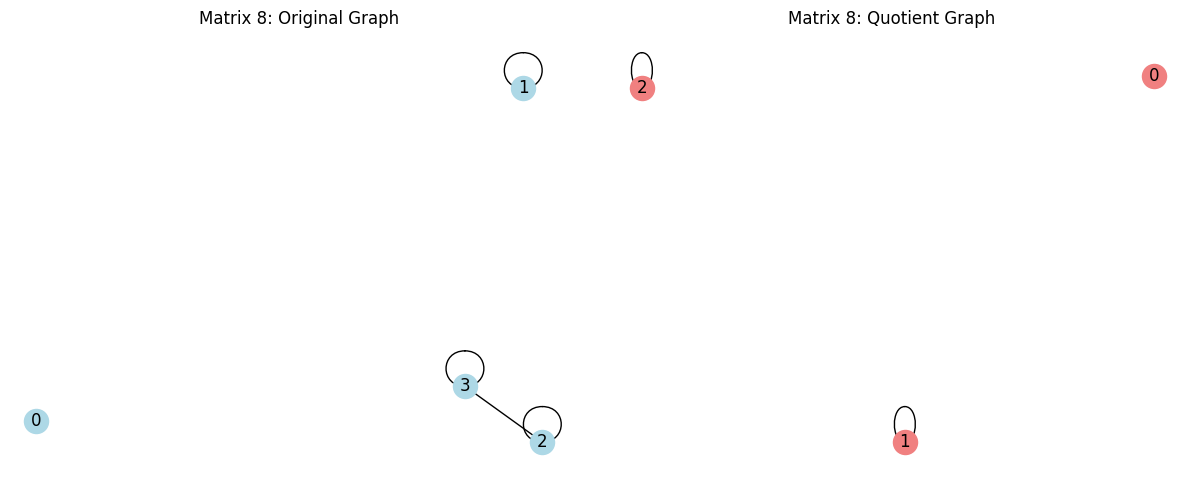

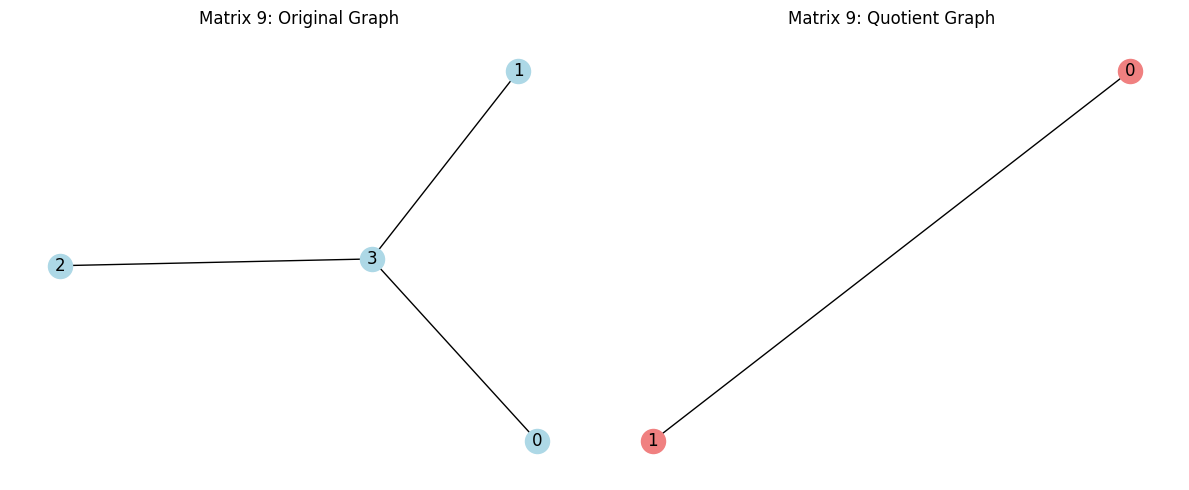

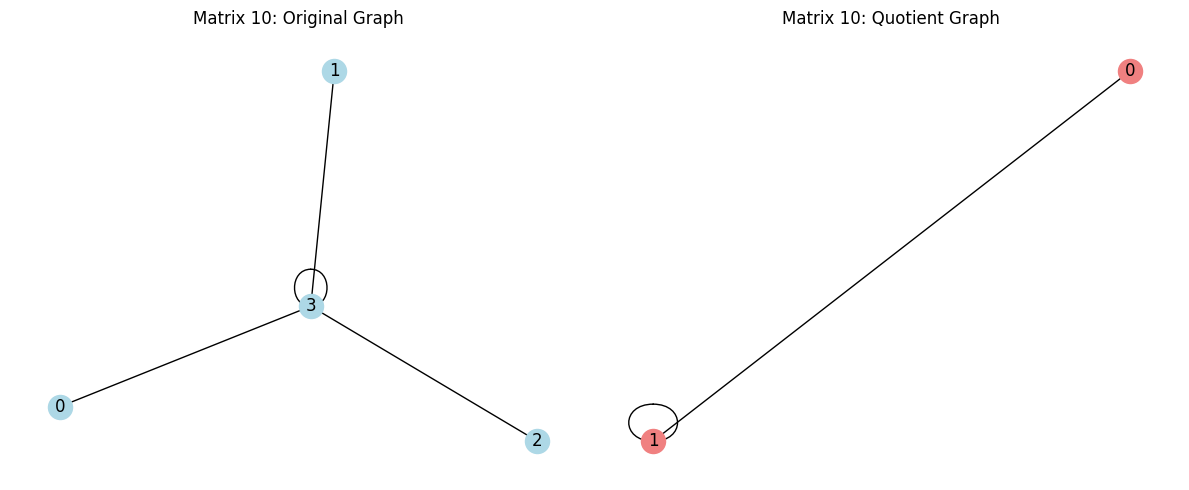

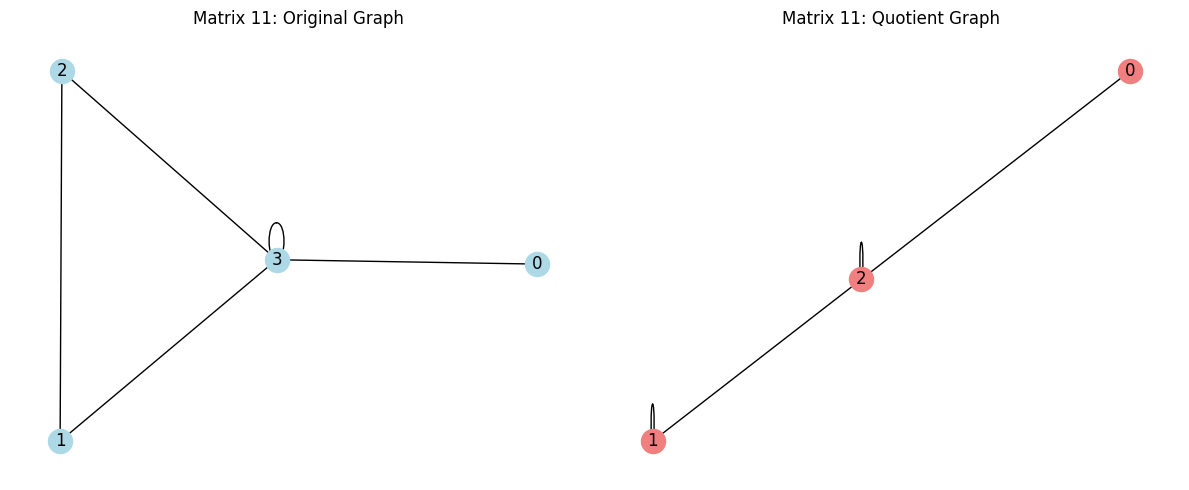

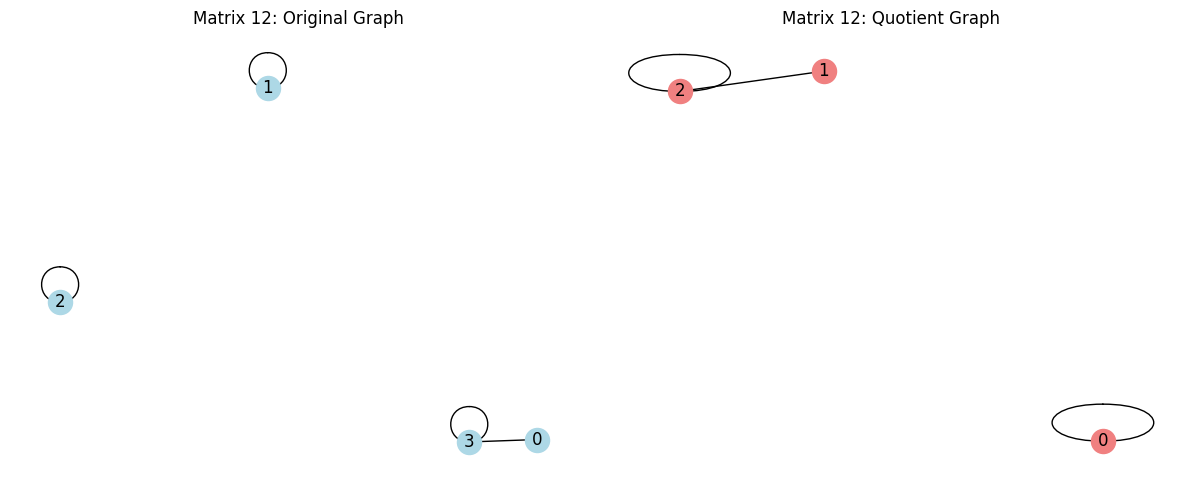

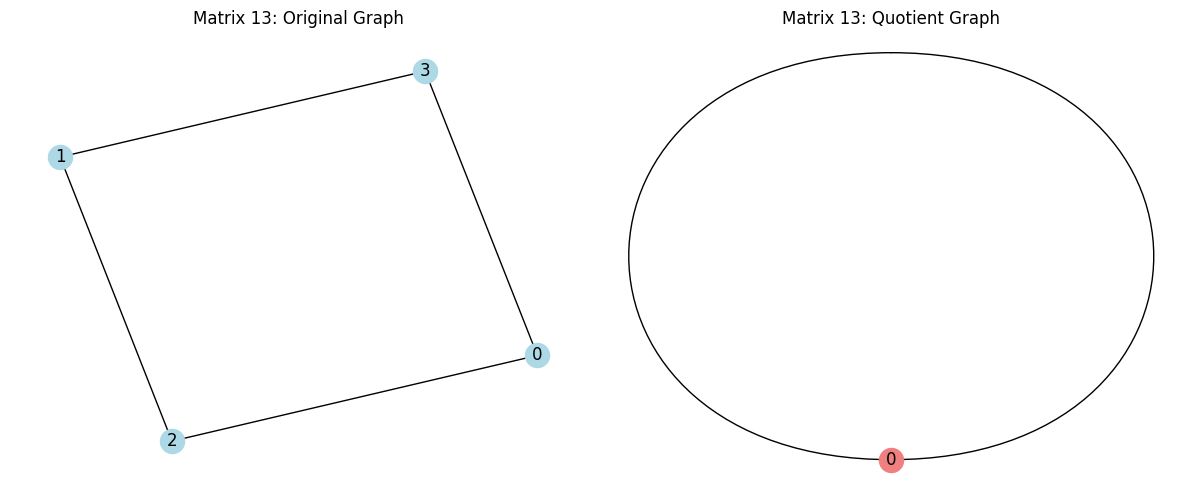

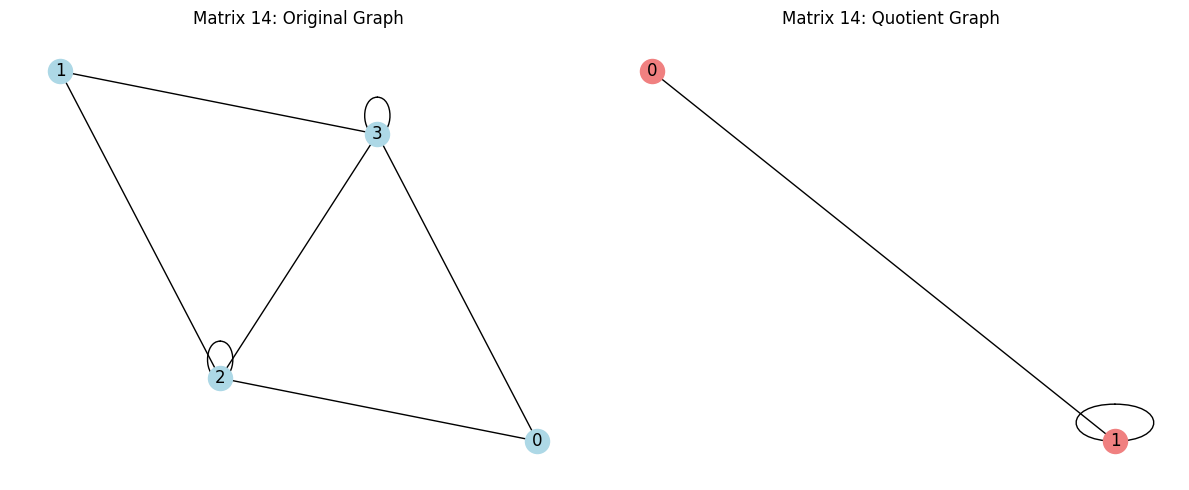

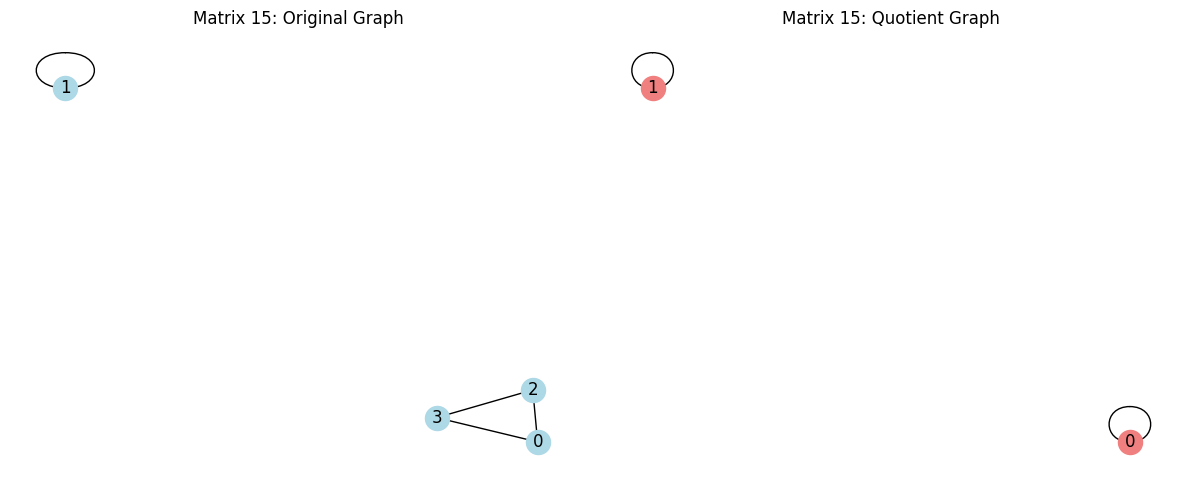

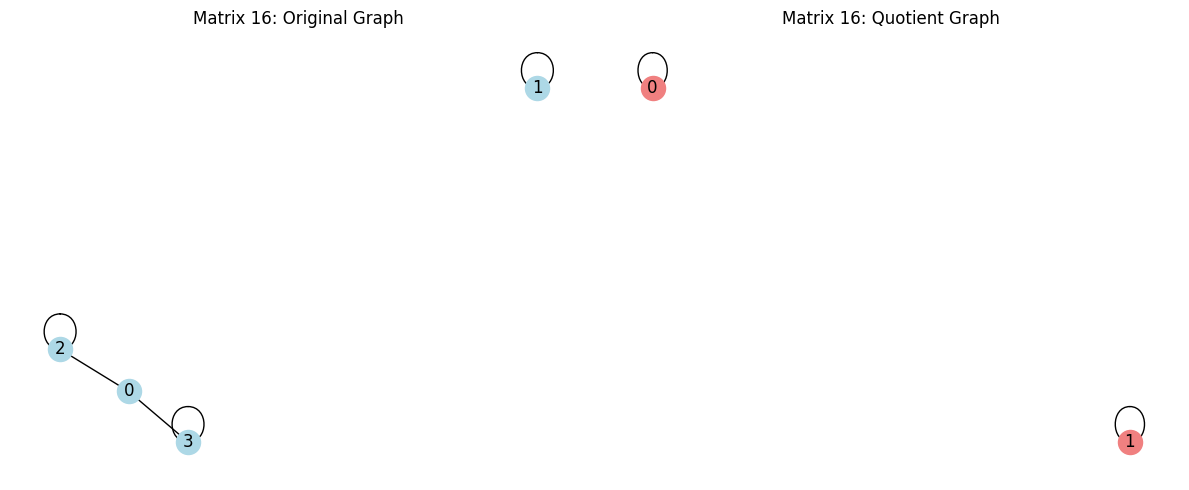

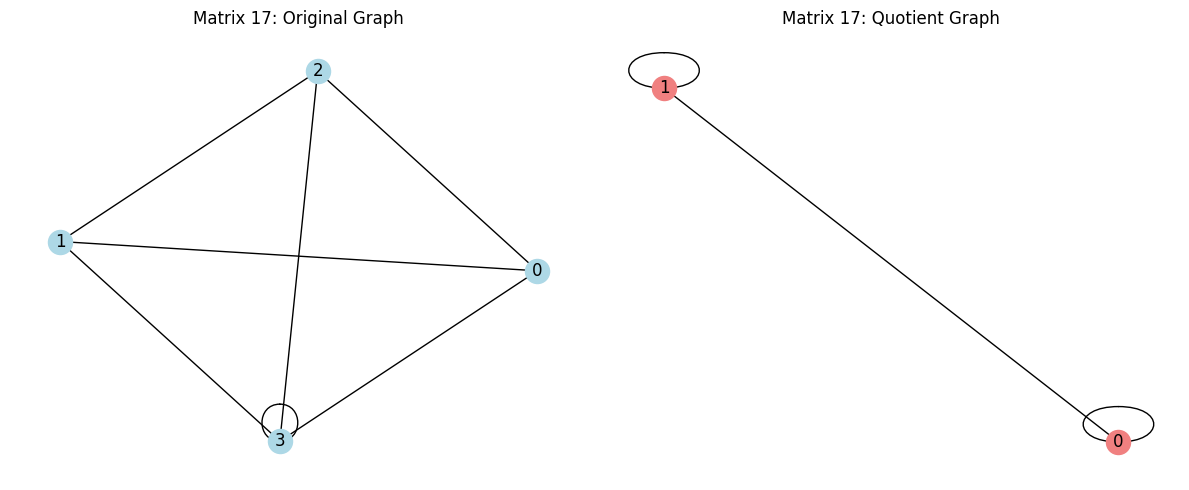

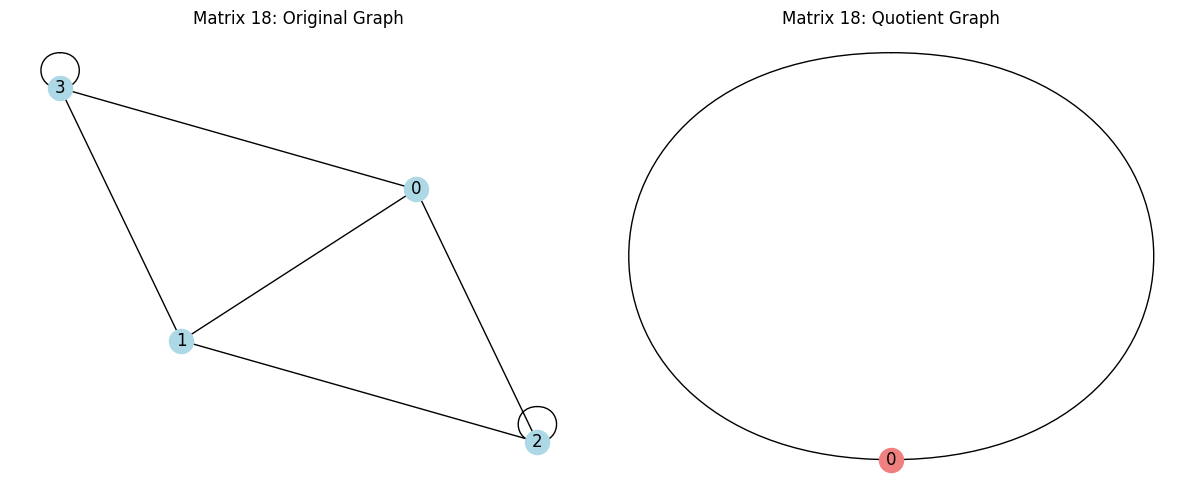

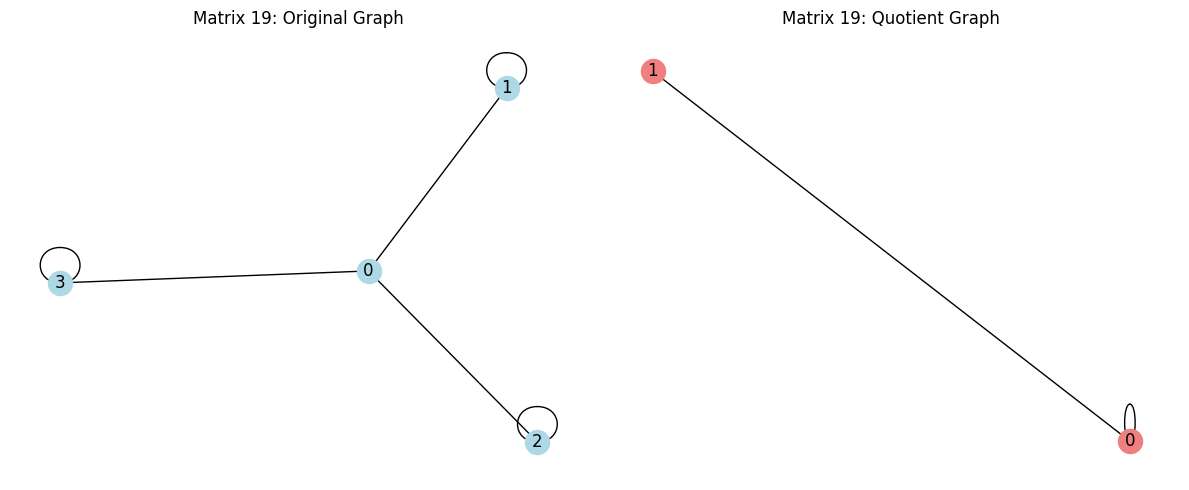

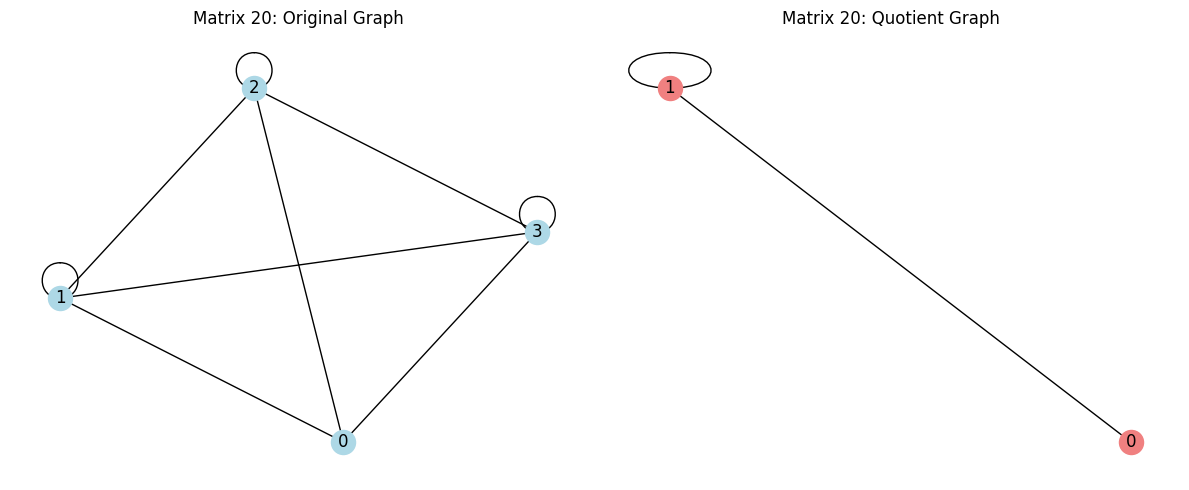

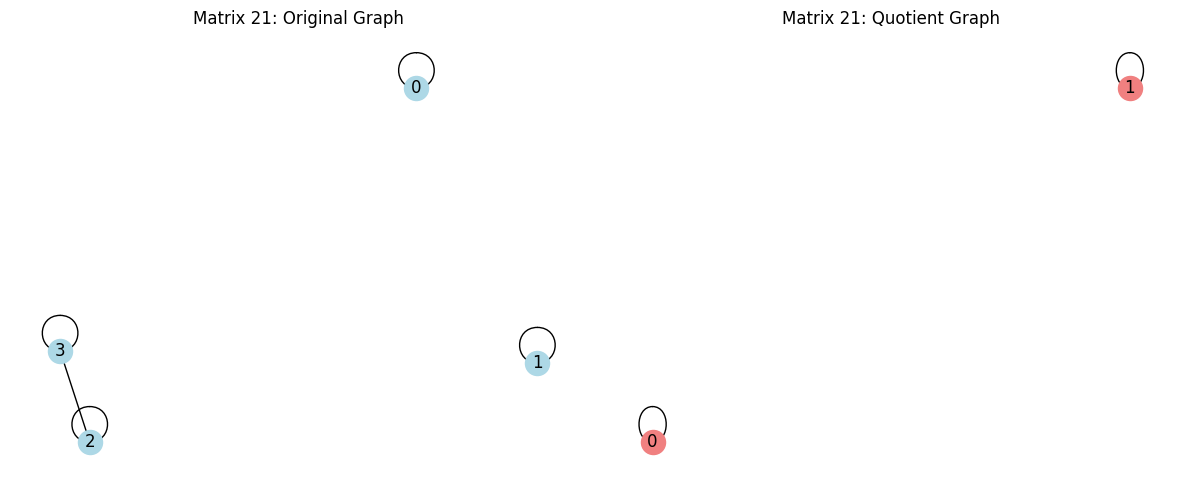

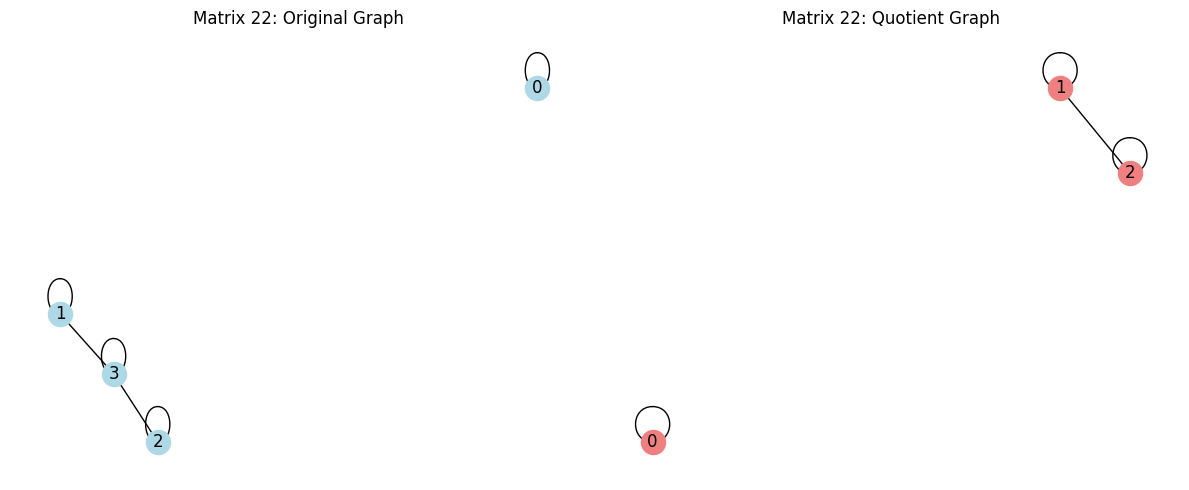

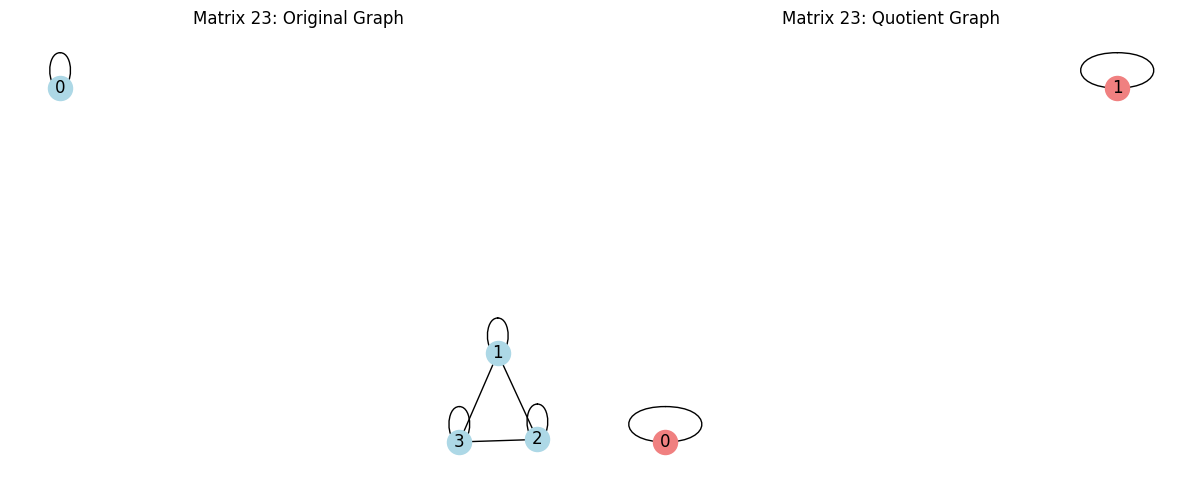

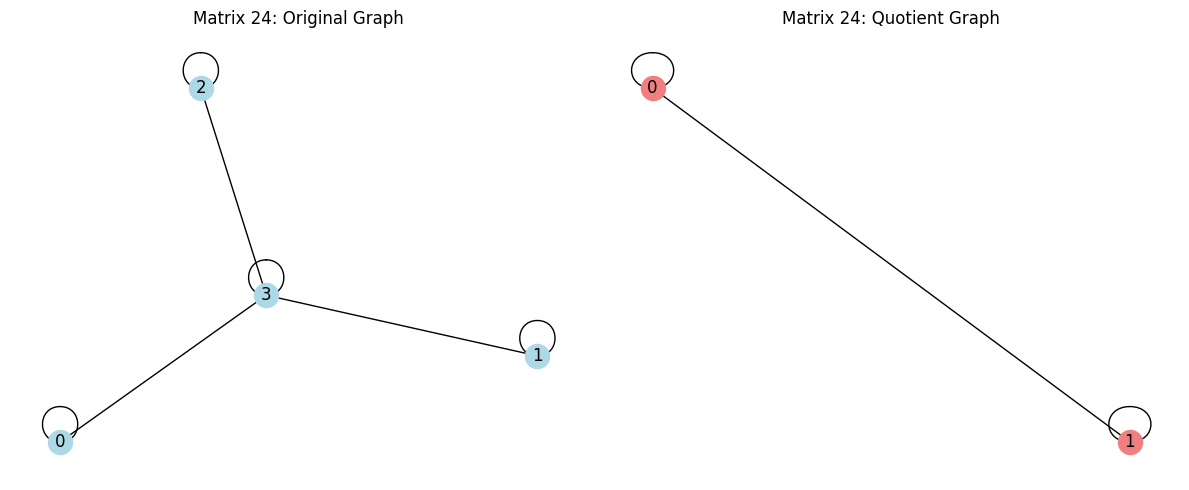

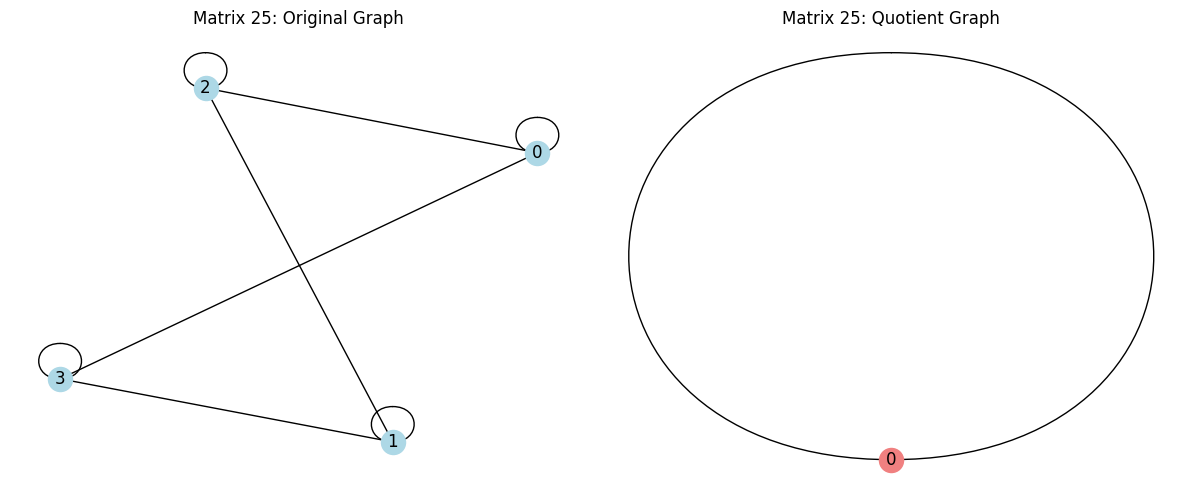

In [ ]:
for i, mat in enumerate(matrices):
    G = nx.from_numpy_array(mat)  # build graph from adjacency :contentReference[oaicite:2]{index=2}
    nx.draw(G, with_labels=True)  # basic drawing :contentReference[oaicite:3]{index=3}
    plt.show()
